# Homework 3: k-means clustering

The goal of this homework is to implement the k-means algorithm, i.e. to find k clusters in a given dataset. The following code creates testdata which you can use to test your implementation. It uses the functon `make_blobs` of the sklearn package (See https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html for mor information on this function). 

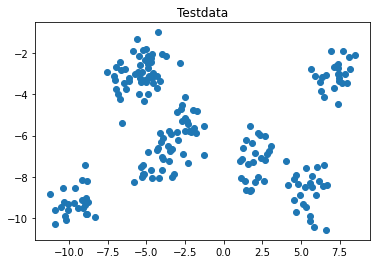

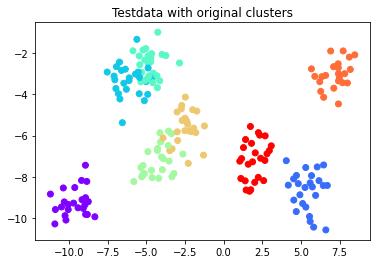

In [25]:
## Creating the testdata
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.datasets import make_blobs # We use this to create sample data
from tqdm import tqdm

d=2 # dimensions. In our example 2
number_of_clusters = 8 

# The following code creates random datapoints with number_of_clusters clusters in d dimensions (cluster_std gives the standard deviation. bigger -> wider spread)
data = make_blobs(n_samples=200, n_features=d,centers=number_of_clusters, cluster_std=0.8)

# The datapoints
points = data[0]

# The cluster assignment used in the creation of the data. This is what we want to obtain by ourself by just considering the points
# contains numbers 0,...,number_of_clusters-1
original_clusters = data[1]

# plots the data points with the original cluster assignment
plt.title("Testdata")
plt.scatter(points[:,0],points[:,1])
plt.show()

plt.title("Testdata with original clusters")
plt.scatter(points[:,0],points[:,1],c=original_clusters,cmap='rainbow')
plt.show()

## Recall from the lecture
Given a $k\geq 1$ (number of clusters) a set of points $P \subset \mathbb{R}^d$ we want to find a function $c: P \rightarrow \{1,\dots,k\}$ which gives the best way of partitioning the set $P$ into $k$ clusters.

For $i=1,\dots,k$ the $i$-th **cluster** is given by 
\begin{align*}
C_i = \left\{ p \in P \mid c(p) = i \right\} \,.
\end{align*}

For a given $c$ the **within-cluster sum of squares (WCSS)** is defined by
\begin{align*}
	S_c = \sum_{i=1}^k \sum_{p \in C_i} ||p - \mu_i||^2 \,.
\end{align*}
Here $\mu_i \in \mathbb{R}^d$ denotes the **mean** of the cluster $C_i$ given by
\begin{align*}
	\mu_i = \frac{1}{|C_i|}\sum_{p \in C_i} p\,.
\end{align*}
The goal is to find a $c$ such that $S_c$ is minimal.


---


## k-means algorithm

1) Initialize the  means $\mu_1, \dots, \mu_k \in \mathbb{R}^d$ with some starting value.
 - **Forgy method:** Choose randomly $k$ different numbers $\{s_1,\dots,s_k\} \subset \{1,\dots,n\}$ and set $$\mu_i= p_{s_i}$$ for $i=1,\dots,k$
 - **Random partition:** Choose $c: P \rightarrow \{1, \dots, k\}$ randomly and set  for $i=1,\dots,k$
\begin{align*}
						\mu_i = \frac{1}{|C_i|}\sum_{p \in C_i} p\,.
\end{align*}

2) Define the clusters $C_i$ for $i=1,\dots,k$ by 
\begin{align*}
	C_i = \big\{ p \in P \mid || p - \mu_i || \leq  || p - \mu_j ||  \text{ for any } j = 1,\dots,k \big\}\,.
\end{align*}

3) Recalculate the means $\mu_i$ for $i=1,\dots,k$ by 
\begin{align*}
	\mu_i = \frac{1}{|C_i|}\sum_{p \in C_i} p\,.
\end{align*}

4) Repeat with step 2.



# **Exercise 1**

Implement the k-means algorithm. You can either implement it in your complete own (and maybe much better) way or you can follow the code below. In the code below we represent the function $c: P \rightarrow \{1,\dots,k\}$ as an array of size $n = |P|$ with entries given in $\{0,\dots,k-1\}$.
*italicized text*

In [26]:
# k-means algorithm

k = 8 # number of clusters

means = np.zeros((k,d)) # the k-means (points in R^d)

n = len(points) # number of points  (make sure to execute the code on top of the homework)

clusters = np.zeros((n), int) # the current function c 

# Initialize the k-means by using the Forgy method 
def init_forgy():
  s = list(range(n))
  random.shuffle(s)
  for i in range(k):
    means[i] = points[s[i]]

# Initilize the k-means with Random partition
def init_random():
  nC = np.zeros((k), int)       # |C_i|
  sC = np.zeros((k,d))          # Sum of p in C_i   sC = {sC_1, sC_2,..., sC_k}
  for i in range(n):
    clusters[i] = random.randrange(k)

  for i in range(n):
    index = clusters[i]    # Set index to be c(p[i]) == cluster[i]
    nC[index] += 1
    sC[index] += points[i]

  for i in range(k):
    means[i] = sC[i] / nC[i]
  


# Updates the means depending on the current clusters
# This is step 3 in the algorithm 
def update_means():
  #raise NotImplementedError
  nC = np.zeros((k), int)       # |C_i|
  sC = np.zeros((k,d))          # Sum of p in C_i
  for i in range(n):
    index = clusters[i]    # Set index to be c(p[i]) == cluster[i]
    nC[index] += 1
    sC[index] += points[i]
  for i in range(k):
    means[i] = sC[i] / nC[i]


# Chooses the cluster according to the current means
# This is step 2
def choose_clusters():
  for point_index in range(n):
    p = points[point_index]
    for i in range(k):
      is_updated = True
      for j in range(k):
        if not np.linalg.norm(p - means[i]) <= np.linalg.norm(p - means[j]):
          is_updated = False
          break
      if is_updated:
        is_updated = False
        for index in range(n):
          if clusters[index] == clusters[point_index] and index != point_index:
            is_updated = True
            break
        if is_updated:
          clusters[point_index] = i
        break



# within-cluster sum of squares (WCSS)
def within_cluster_sos(input_clusters=clusters):
  sum=0
  for i in range(k):
    for j in range(n): 
      if input_clusters[j]==i:
        sum+=np.linalg.norm(points[j]-means[i])**2
  return sum

# The k-means algorithm with random partition
def kmeans_random(number_of_steps=10):
  init_random() # Step 1

  print("After init with Random Partition: WCSS = ", within_cluster_sos())
  plt.scatter(points[:,0],points[:,1],c=clusters,cmap='rainbow')
  plt.show()

  for s in range(number_of_steps):
    choose_clusters() # Step 2
    update_means() # Step 3

  print("Did ", number_of_steps ," steps. WCSS = ", within_cluster_sos())
  #fig, (ax1, ax2) = plt.subplots(2)
  plt.scatter(points[:,0],points[:,1],c=clusters,cmap='rainbow')
  plt.show()
  #plt.scatter(points[:,0],points[:,1],c=original_clusters,cmap='rainbow')
  #plt.show()

# The k-means algorithm with the Forgy method
def kmeans_forgy(number_of_steps=10):
  init_forgy() # Step 1
  choose_clusters()

  print("After init with Forgy: WCSS = ", within_cluster_sos())
  plt.scatter(points[:,0],points[:,1],c=clusters,cmap='rainbow')
  plt.show()

  for s in range(number_of_steps):
    choose_clusters() # Step 2
    update_means() # Step 3

  print("Did ", number_of_steps ," steps. WCSS = ", within_cluster_sos())
  plt.scatter(points[:,0],points[:,1],c=clusters,cmap='rainbow')
  plt.show()

Test your implementation with the following code (You can also implement your own tests).


After init with Random Partition: WCSS =  7286.427015717477


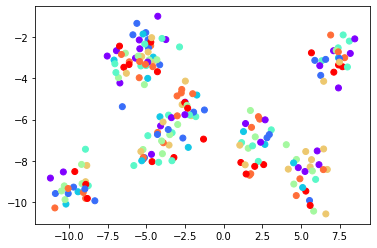

Did  20  steps. WCSS =  231.2594297844417


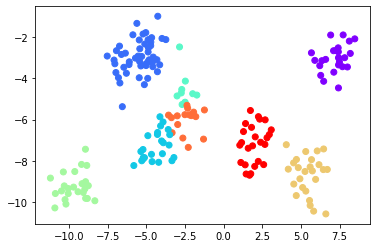

After init with Forgy: WCSS =  1534.3591724901726


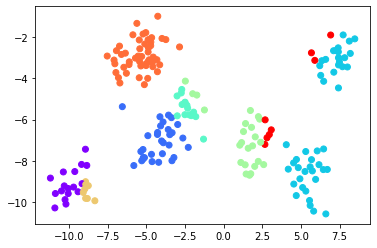

Did  20  steps. WCSS =  227.88633276391155


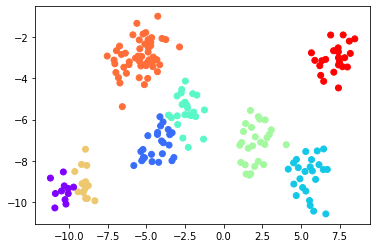

In [27]:
kmeans_random(20)
kmeans_forgy(20)

# **Exercise 2** (Bonus)

For a given dataset consider different $k$. Plot the WCSS for different $k$ after using the $k$-means algorithm. How can you decide with this graph which $k$ might be the best?

In [28]:
def WCSS(inp_k, number_of_steps=10):
    k = inp_k
    means = np.zeros((k,d)) # the k-means (points in R^d)
    #clusters = np.zeros((n), int) # the current function c
    #fig, (ax1, ax2) = plt.subplots(1, 2)

    # Random method:
    init_random() # Step 1
    for s in range(number_of_steps):
        choose_clusters() # Step 2
        update_means() # Step 3
    random_WCSS = within_cluster_sos()
    #ax1.scatter(points[:,0],points[:,1],c=clusters,cmap='rainbow')
    #ax1.set_title("WCSS = {}".format(random_WCSS))
    #ax1.set_xlabel("Random init")

    means = np.zeros((k,d))
    # Forgy method:
    init_forgy() # Step 1
    choose_clusters()
    for s in range(number_of_steps):
        choose_clusters() # Step 2
        update_means() # Step 3
    forgy_WCSS = within_cluster_sos()
    #ax2.scatter(points[:,0],points[:,1],c=clusters,cmap='rainbow')
    #ax2.set_title("WCSS = {}".format(forgy_WCSS))
    #ax2.set_xlabel("Forgy init")
    #plt.show()

    return [random_WCSS, forgy_WCSS]

# Compute the WCSS dependency on k
KK = np.arange(2, 11)
WCSS_arr = []
with tqdm(total=len(KK)) as pbar:
    pbar.desc = "Computation progress"
    for kk in KK:
        WCSS_arr.append(WCSS(kk, 20))
        pbar.update(1)

print("\nComputation done.")

Computation progress: 100%|██████████| 9/9 [00:11<00:00,  1.27s/it]
Computation done.



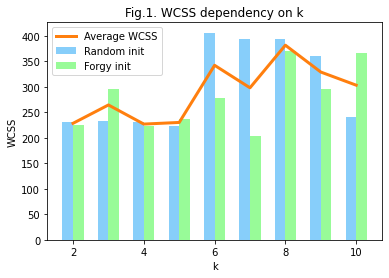

In [29]:
# Plot the results
fig, ax = plt.subplots()
width = 0.3
random_graph = ax.bar(KK - width/2, [row[0] for row in WCSS_arr], width, label="Random init", color="lightskyblue")
forgy_graph = ax.bar(KK + width/2, [row[1] for row in WCSS_arr], width,  label="Forgy init", color="palegreen")
avg_line = ax.plot(KK, [(row[0]+row[1])/2 for row in WCSS_arr], lw=3, label="Average WCSS", color="tab:orange")
ax.set_title("Fig.1. WCSS dependency on k")
ax.set_xlabel("k")
ax.set_ylabel("WCSS")
ax.legend()
plt.show()

The dependency graph of $WCSS$ on $k$ provides us the numerical basis for choosing the best number of clusters $k$. For a given set of points, the value of $k$ that results in the smallest within-cluster sum of squares ($WCSS$) should be the best.

However, it should be noted that the above graph may change significantly each time it is regenerated for the same set of points. The reason is because both initialisation methods (random and forgy) depend on the inititial randomisation results which change each time the graph is generated. For better consistency, each k-means algorithm should be repeated several times for each $k$ as follows.

In [31]:
def WCSS(inp_k, number_of_steps=10, no_of_iterations=5):
    k = inp_k
    means = np.zeros((k,d)) # the k-means (points in R^d)
    #clusters = np.zeros((n), int) # the current function c
    #fig, (ax1, ax2) = plt.subplots(1, 2)

    # Random method:
    random_WCSS_arr = []; random_WCSS = 0
    for count in range(no_of_iterations):
        init_random() # Step 1
        for s in range(number_of_steps):
            choose_clusters() # Step 2
            update_means() # Step 3
        temp_wcss = within_cluster_sos()
        random_WCSS_arr.append(temp_wcss)
        random_WCSS += temp_wcss
    random_WCSS /= no_of_iterations
    #ax1.scatter(points[:,0],points[:,1],c=clusters,cmap='rainbow')
    #ax1.set_title("WCSS = {}".format(random_WCSS))
    #ax1.set_xlabel("Random init")


    # Forgy method:
    forgy_WCSS_arr = []; forgy_WCSS = 0
    for count in range(no_of_iterations):
        means = np.zeros((k,d))
        init_forgy() # Step 1
        choose_clusters()
        for s in range(number_of_steps):
            choose_clusters() # Step 2
            update_means() # Step 3
        temp_wcss += within_cluster_sos()
        forgy_WCSS_arr.append(temp_wcss)
        forgy_WCSS += temp_wcss
    forgy_WCSS /= no_of_iterations
    #ax2.scatter(points[:,0],points[:,1],c=clusters,cmap='rainbow')
    #ax2.set_title("WCSS = {}".format(forgy_WCSS))
    #ax2.set_xlabel("Forgy init")
    #plt.show()

    err_random = [min(random_WCSS_arr), max(random_WCSS_arr)]
    err_forgy = [min(forgy_WCSS_arr), max(forgy_WCSS_arr)]

    return [random_WCSS, forgy_WCSS, err_random, err_forgy]

# Compute the WCSS dependency on k
KK = np.arange(2, 11)
WCSS_arr = []
with tqdm(total=len(KK)) as pbar:
    pbar.desc = "Computation progress"
    for kk in KK:
        WCSS_arr.append(WCSS(kk, 20))
        pbar.update(1)

print("\nComputation done.")

Computation progress: 100%|██████████| 9/9 [00:54<00:00,  6.06s/it]
Computation done.



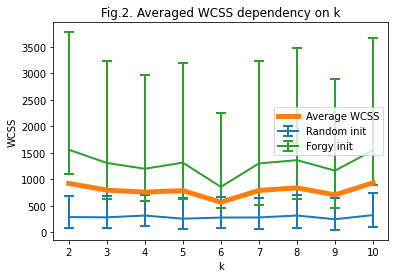

In [39]:
# Plot the results
fig, ax = plt.subplots()
width = 0.0
yerr_random = np.transpose([row[2] for row in WCSS_arr])
yerr_forgy = np.transpose([row[3] for row in WCSS_arr])
random_graph = ax.errorbar(KK - width/2, [row[0] for row in WCSS_arr], yerr_random, label="Random init", color="tab:blue", lw=2, elinewidth=2, barsabove=True, capsize=5, capthick=2)
forgy_graph = ax.errorbar(KK + width/2, [row[1] for row in WCSS_arr], yerr_forgy,  label="Forgy init", color="tab:green", lw=2, elinewidth=2, barsabove=True, capsize=5, capthick=2)
avg_line = ax.plot(KK, [(row[0]+row[1])/2 for row in WCSS_arr], lw=5, label="Average WCSS", color="tab:orange")
ax.set_title("Fig.2. Averaged WCSS dependency on k")
ax.set_xlabel("k")
ax.set_ylabel("WCSS")
ax.legend()
plt.show()

The graph in Fig.2 shows the $WCSS$'s range and average value after 5 iterations for each initialisation method at each value of $k$. As can be seen from Fig.2, the $k$ that results in a bad $WCSS$ in Fig.1 may belong to the case of a bad initialisation. This $k$ is not necessarily as bad as it appears in Fig.1 because the averaged $WCSS$ shown in Fig.2 is not as high.

In conclusion, based on the comparison between Fig.1 and Fig.2, we propose that the best $k$ shall be chosen as the value of $k$ that minimises the average $WCSS$ shown in Fig.2.